                                              filename       MAE
327  eform_compact_dim_s250_initial_downstream_Neit...  0.308952
328  eform_compact_dim_s250_initial_downstream_Neit...  0.307942
329  eform_compact_dim_s250_initial_downstream_Neit...  0.329165
330  eform_compact_dim_s250_initial_downstream_Neit...  0.328177
331  eform_compact_dim_s250_initial_downstream_Neit...  0.330667
332  eform_compact_dim_s250_initial_downstream_Neit...  0.312210
333  eform_compact_dim_s250_initial_downstream_Neit...  0.325065
334  eform_compact_dim_s250_initial_downstream_Neit...  0.325347
335  eform_compact_dim_s250_initial_downstream_Neit...  0.301044
336  eform_compact_dim_s250_initial_downstream_Neit...  0.304379
337  eform_compact_dim_s250_initial_downstream_Neit...  0.332154
338  eform_compact_dim_s250_initial_downstream_Neit...  0.281809
[275    0.427454
276    0.442873
277    0.440887
278    0.463643
279    0.449778
280    0.456582
281    0.453696
282    0.402963
283    0.421131
284    0.4

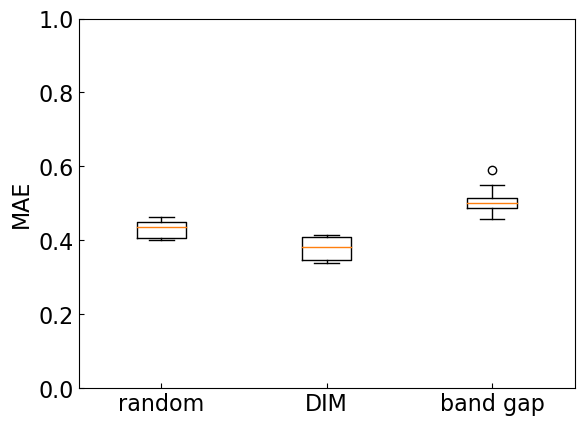

[327    0.308952
328    0.307942
329    0.329165
330    0.328177
331    0.330667
332    0.312210
333    0.325065
334    0.325347
335    0.301044
336    0.304379
337    0.332154
338    0.281809
Name: MAE, dtype: float64, 296    0.326156
297    0.318401
298    0.298494
299    0.324569
300    0.330291
301    0.314128
302    0.274809
303    0.322947
304    0.308217
305    0.326471
306    0.293212
307    0.303291
Name: MAE, dtype: float64, 308    0.391890
309    0.358179
310    0.367847
311    0.394972
312    0.394079
313    0.407255
314    0.380277
315    0.368670
316    0.351576
317    0.385637
318    0.363143
Name: MAE, dtype: float64]


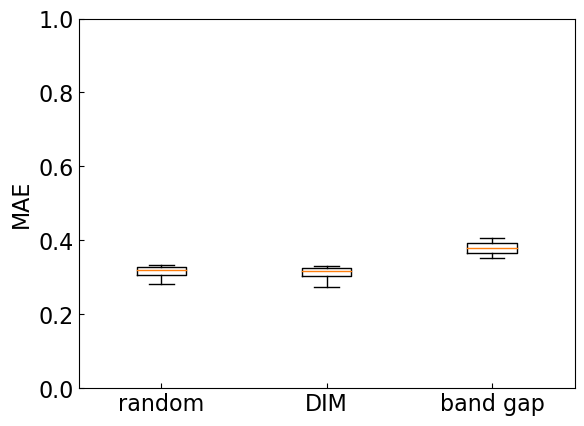

[212    0.201427
213    0.191779
214    0.191486
215    0.204437
216    0.192043
217    0.173190
218    0.185405
219    0.207251
220    0.181707
221    0.191179
222    0.188078
Name: MAE, dtype: float64, 188    0.212671
189    0.211002
190    0.219802
191    0.202907
192    0.196572
193    0.225673
194    0.209520
195    0.207516
196    0.198013
197    0.191946
Name: MAE, dtype: float64, 198    0.221568
199    0.230322
200    0.243352
201    0.230578
202    0.227732
203    0.269890
204    0.232163
205    0.246796
206    0.242757
207    0.252887
208    0.238846
209    0.230359
Name: MAE, dtype: float64]


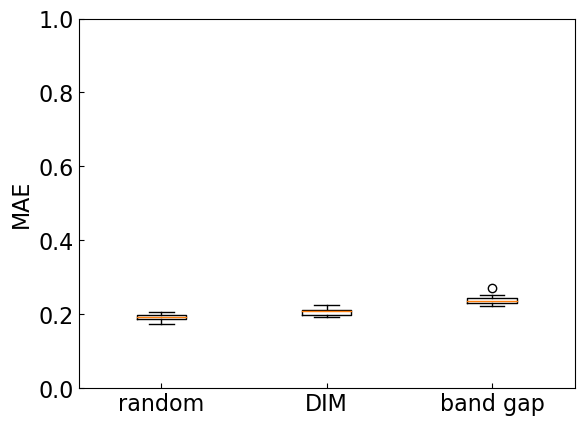

[182    0.077946
183    0.081435
184    0.078657
185    0.083707
Name: MAE, dtype: float64, 174    0.086564
175    0.084140
176    0.088033
177    0.089075
Name: MAE, dtype: float64, 178    0.102547
179    0.099142
180    0.102102
181    0.098835
Name: MAE, dtype: float64]


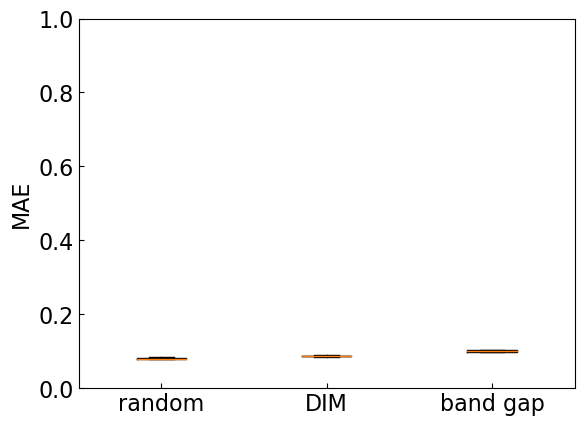

In [2]:
import pandas as pd
import matplotlib.pyplot as plt      
import matplotlib.colors as colors
import matplotlib.ticker as ticker
import matplotlib

plt.rcParams["xtick.direction"] = "in"
plt.rcParams["ytick.direction"] = "in"

font = {'size'   : 16}

matplotlib.rc('font', **font)

DownMAE = pd.read_csv("Downstream_MAEs.csv",header=None,names=["filename","MAE"])
print(DownMAE[DownMAE["filename"].str.contains("eform_compact_dim_s250_initial_downstream_Neither")])

box_plot_1 = [["eform_compact_dim_s100_initial_downstream_Neither_", "eform_compact_dim_s100_DIM_downstream_Neither_DIM_eform_", "eform_compact_dim_s100_DIM_downstream_Neither_Supervised_egap_"],["random","DIM","band gap"],"eform_s100_transfer.png",[0.0,1.0]]
box_plot_2 = [["eform_compact_dim_s250_initial_downstream_Neither_","eform_compact_dim_s250_DIM_downstream_Neither_DIM_eform_","eform_compact_dim_s250_DIM_downstream_Neither_Supervised_egap_"],["random","DIM","band gap"],"eform_s250_transfer.png",[0.0,1.0]]
box_plot_3 = [["eform_compact_dim_s1000_initial_downstream_Neither_", "eform_compact_dim_s1000_DIM_downstream_Neither_DIM_eform_", "eform_compact_dim_s1000_DIM_downstream_Neither_Supervised_egap_"],["random","DIM","band gap"],"eform_s1000_transfer.png",[0.0,1.0]]
box_plot_4 = [["eform_compact_dim_s10000_initial_downstream_Neither_", "eform_compact_dim_s10000_DIM_downstream_Neither_DIM_eform_", "eform_compact_dim_s10000_DIM_downstream_Neither_Supervised_egap_"],["random","DIM","band gap"],"eform_s10000_transfer.png",[0.0,1.0]]
box_plot_queue = [box_plot_1,box_plot_2,box_plot_3,box_plot_4]

for plots in box_plot_queue:
    plt.figure()
    vectors = [DownMAE[DownMAE["filename"].str.contains(i)]["MAE"] for i in plots[0]]
    print(vectors)
    plt.boxplot(vectors,labels=plots[1])
    plt.ylim(plots[3])
    plt.ylabel("MAE")
    plt.savefig(plots[2])
    plt.show()

['Initial_eform' 'nocomp_klnorm_moremultiloss_eform' 'Initial_egap'
 'nocomp_klnorm_moremultiloss_egap']


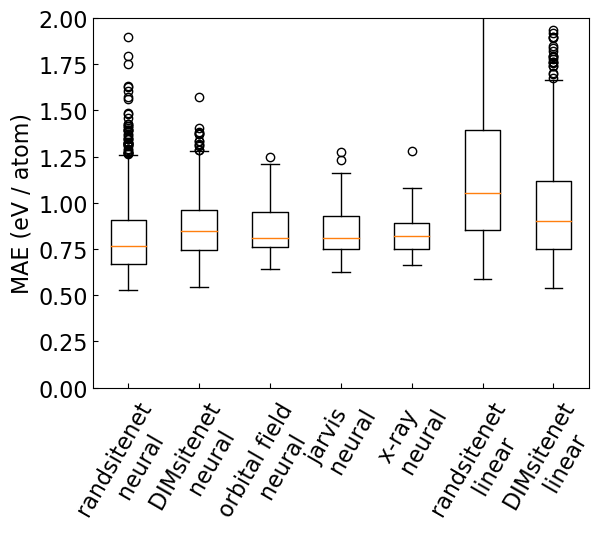

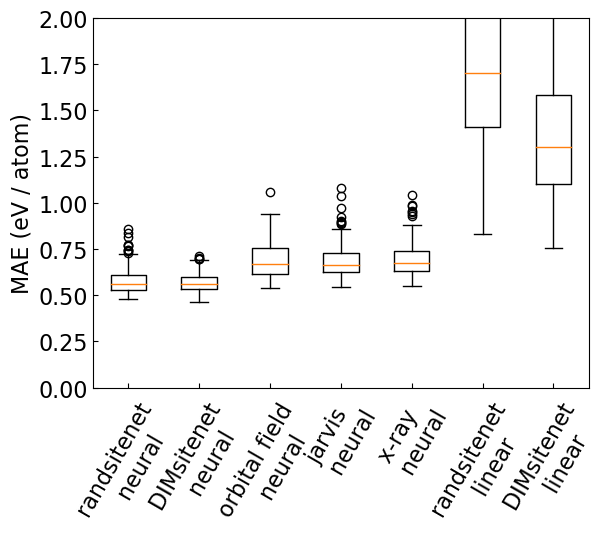

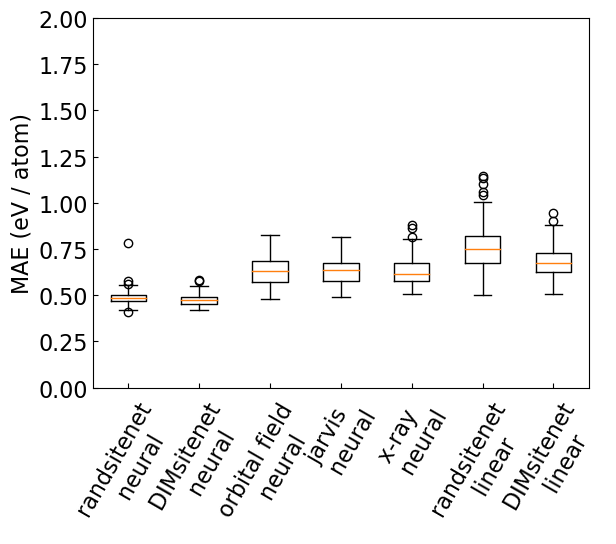

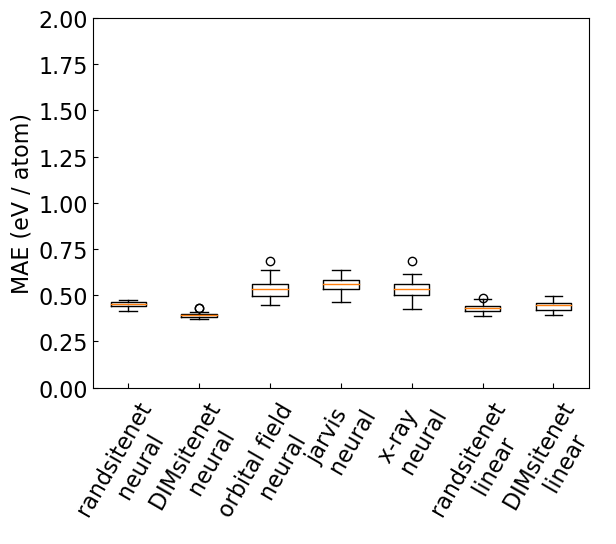

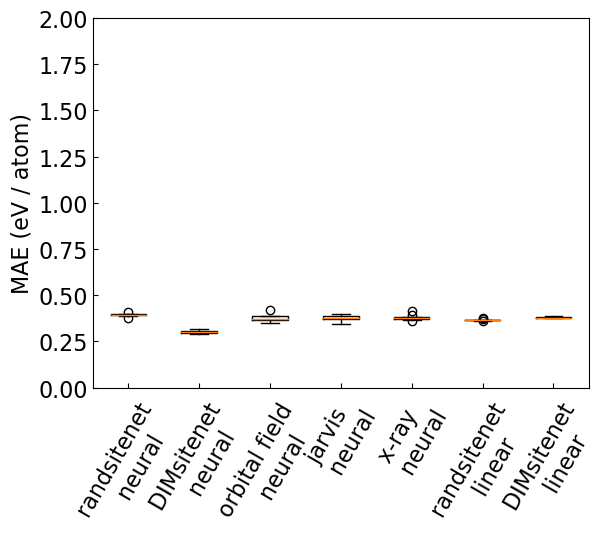

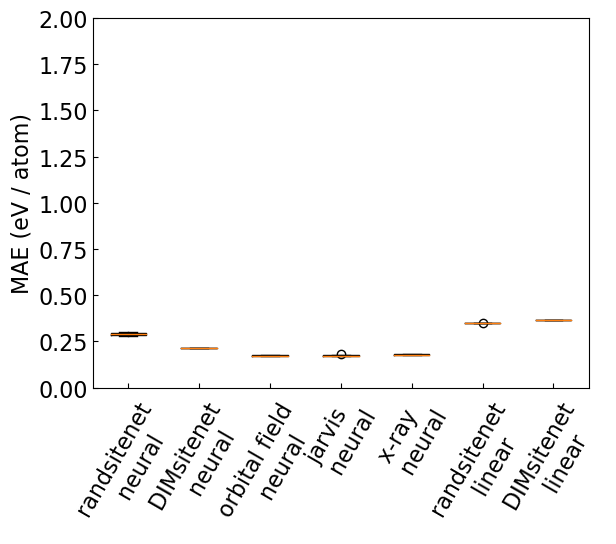

In [2]:
import pandas as pd
import matplotlib.pyplot as plt      
import matplotlib.colors as colors
import matplotlib.ticker as ticker
import matplotlib

plt.rcParams["xtick.direction"] = "in"
plt.rcParams["ytick.direction"] = "in"

font = {'size'   : 16}

matplotlib.rc('font', **font)

RepMAE = pd.read_csv("Downstream_DIM.csv")
eformorbitalMAE = pd.read_csv("featurizer_pickles/eformorbital_Downstream_Featurized.csv")
eformjarvisMAE = pd.read_csv("featurizer_pickles/eformjarvis_Downstream_Featurized.csv")
eformxrayMAE =  pd.read_csv("featurizer_pickles/eformxray_Downstream_Featurized.csv")
print(RepMAE["model"].unique())

for limit,name in zip([10,50,100,250,1000,10000],["eformorbital_replearn_10.png","eformorbital_replearn_50.png","eformorbital_replearn_100.png","eformorbital_replearn_250.png","eformorbital_replearn_1000.png","eformorbital_replearn_10000.png"]):
    plt.figure()
    vectors1 = RepMAE[(RepMAE["limit"] == limit) & (RepMAE["model"] == "Initial_eform")]
    vectors2 = RepMAE[(RepMAE["limit"] == limit) & (RepMAE["model"] == "nocomp_klnorm_moremultiloss_eform")]
    vectors3 = eformorbitalMAE[(eformorbitalMAE["limit"] == limit) & (eformorbitalMAE["model"] == "eform_OrbitalFieldMatrix")]
    vectors4 = eformjarvisMAE[(eformjarvisMAE["limit"] == limit) & (eformjarvisMAE["model"] == "eform_jarvis")]
    vectors5 = eformxrayMAE[(eformxrayMAE["limit"] == limit) & (eformxrayMAE["model"] == "eform_xray")]
    plt.boxplot([vectors1["nn_MAE"],vectors2["nn_MAE"],vectors3["nn_MAE"],vectors4["nn_MAE"],vectors5["nn_MAE"],vectors1["lin_MAE"],vectors2["lin_MAE"]],labels=["randsitenet \n neural","DIMsitenet \n neural","orbital field \n neural","jarvis \n neural","x-ray \n neural","randsitenet \n linear","DIMsitenet \n linear"],widths=0.5)
    plt.xticks(rotation=60)
    plt.xlim(0.5,7.5)
    plt.ylim(0,2)
    plt.ylabel("MAE (eV / atom)")
    plt.savefig(name)
    plt.show()

['Initial_eform' 'nocomp_klnorm_moremultiloss_eform' 'Initial_egap'
 'nocomp_klnorm_moremultiloss_egap']


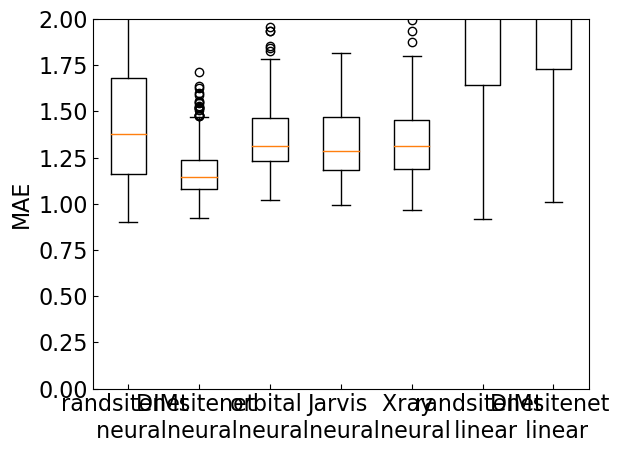

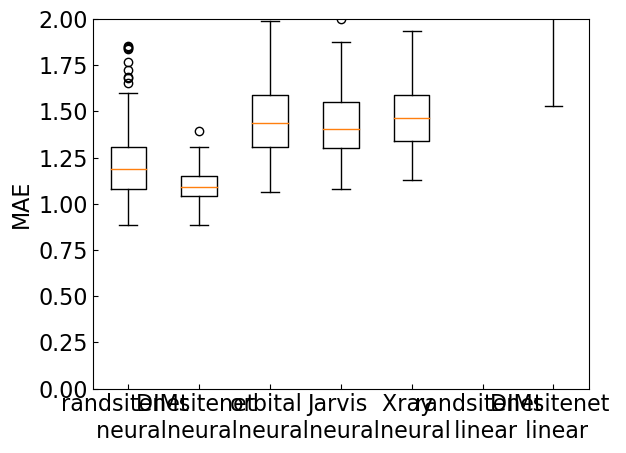

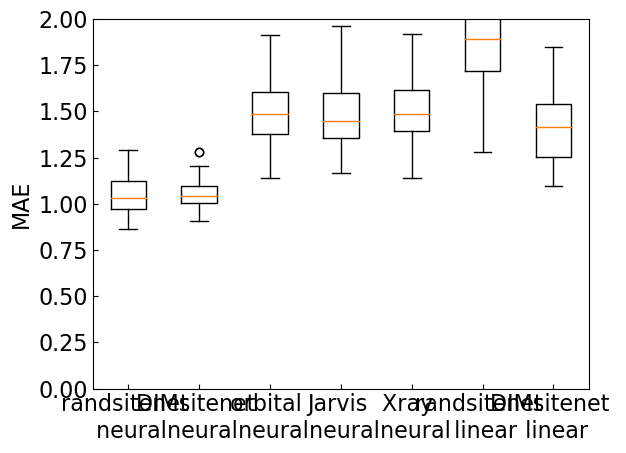

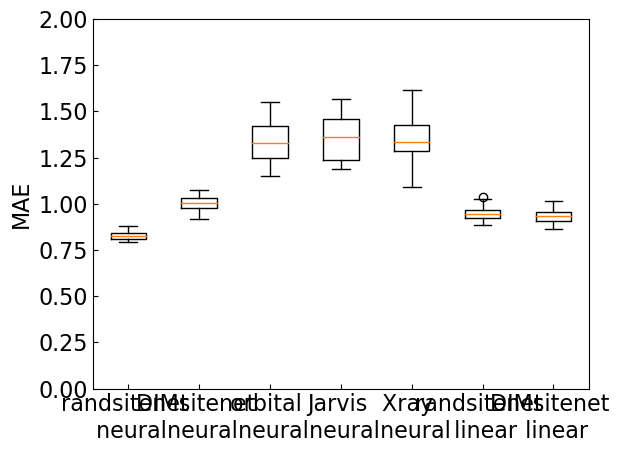

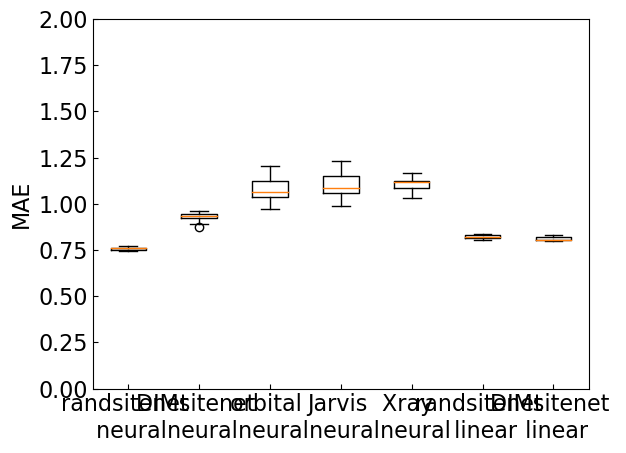

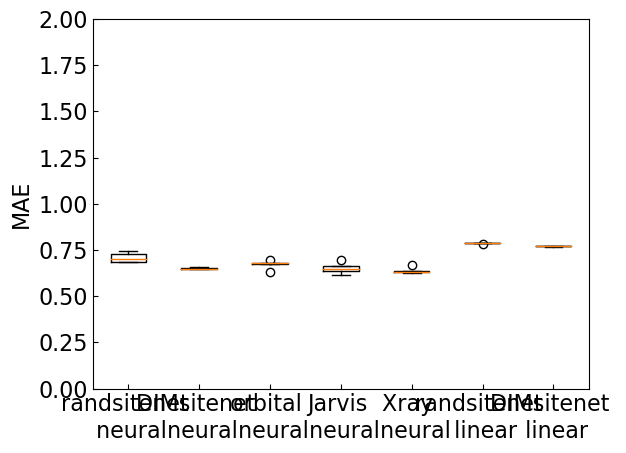

In [6]:
import pandas as pd
import matplotlib.pyplot as plt      
import matplotlib.colors as colors
import matplotlib.ticker as ticker
import matplotlib

plt.rcParams["xtick.direction"] = "in"
plt.rcParams["ytick.direction"] = "in"

font = {'size'   : 16}

matplotlib.rc('font', **font)

RepMAE = pd.read_csv("Downstream_DIM.csv")
eformorbitalMAE = pd.read_csv("featurizer_pickles/egaporbital_Downstream_Featurized.csv")
eformjarvisMAE = pd.read_csv("featurizer_pickles/egapjarvis_Downstream_Featurized.csv")
eformxrayMAE =  pd.read_csv("featurizer_pickles/egapxray_Downstream_Featurized.csv")
print(RepMAE["model"].unique())

for limit,name in zip([10,50,100,250,1000,10000],["eformorbital_replearn_10.png","eformorbital_replearn_50.png","eformorbital_replearn_100.png","eformorbital_replearn_250.png","eformorbital_replearn_1000.png","eformorbital_replearn_10000.png"]):
    plt.figure()
    vectors1 = RepMAE[(RepMAE["limit"] == limit) & (RepMAE["model"] == "Initial_egap")]
    vectors2 = RepMAE[(RepMAE["limit"] == limit) & (RepMAE["model"] == "nocomp_klnorm_moremultiloss_egap")]
    vectors3 = eformorbitalMAE[(eformorbitalMAE["limit"] == limit) & (eformorbitalMAE["model"] == "egap_orbital")]
    vectors4 = eformjarvisMAE[(eformjarvisMAE["limit"] == limit) & (eformjarvisMAE["model"] == "egap_jarvis")]
    vectors5 = eformxrayMAE[(eformxrayMAE["limit"] == limit) & (eformxrayMAE["model"] == "egap_xray")]
    plt.boxplot([vectors1["nn_MAE"],vectors2["nn_MAE"],vectors3["nn_MAE"],vectors4["nn_MAE"],vectors5["nn_MAE"],vectors1["lin_MAE"],vectors2["lin_MAE"]],labels = ["randsitenet \n neural","DIMsitenet \n neural","orbital \n neural","Jarvis \n neural","Xray \n neural","randsitenet \n linear","DIMsitenet \n linear"])
    plt.ylim(0,2)
    plt.ylabel("MAE")
    plt.savefig(name)
    plt.show()

['Initial_eform' 'nocomp_klnorm_moremultiloss_eform' 'Initial_egap'
 'nocomp_klnorm_moremultiloss_egap' 'klnorm_eform']


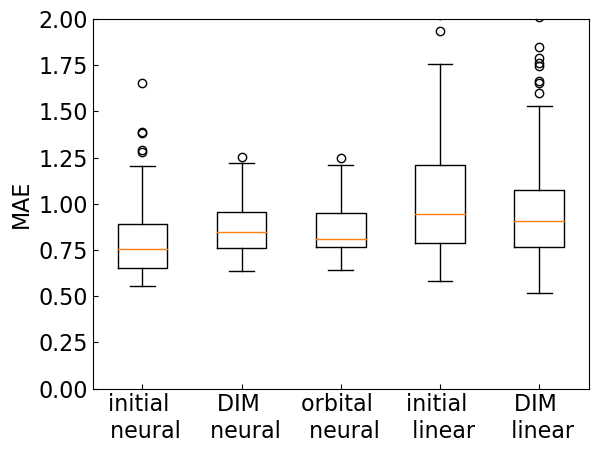

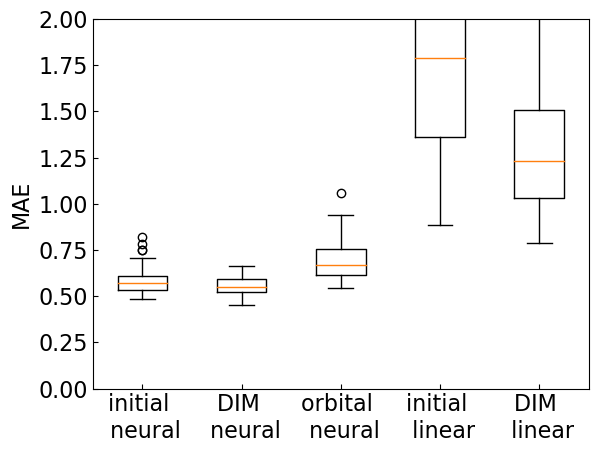

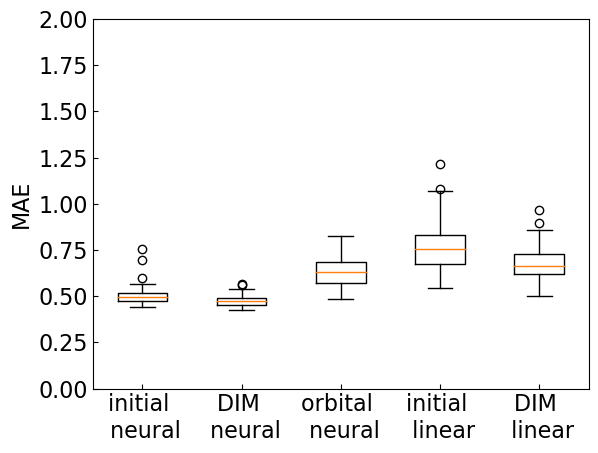

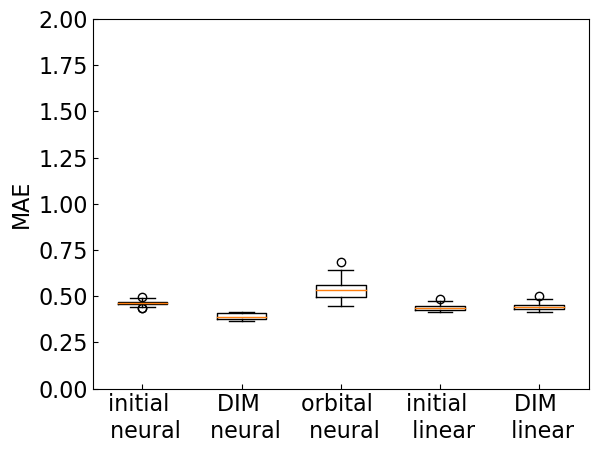

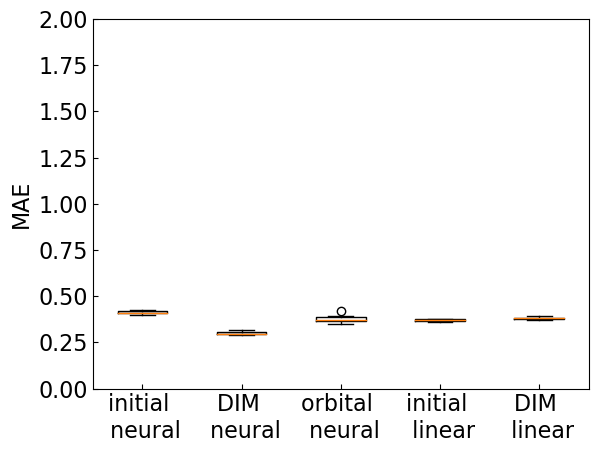

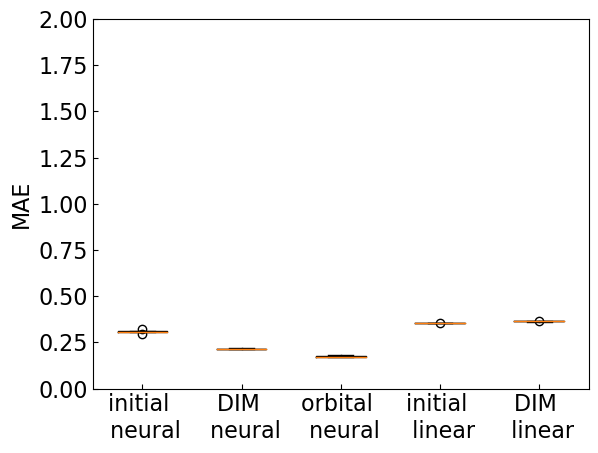

In [3]:
import pandas as pd
import matplotlib.pyplot as plt      
import matplotlib.colors as colors
import matplotlib.ticker as ticker
import matplotlib

plt.rcParams["xtick.direction"] = "in"
plt.rcParams["ytick.direction"] = "in"

font = {'size'   : 16}

matplotlib.rc('font', **font)

RepMAE = pd.read_csv("Downstream_DIM.csv")
FeatMAE = pd.read_csv("featurizer_pickles/eformorbital_Downstream_Featurized.csv")
print(RepMAE["model"].unique())

for limit,name in zip([10,50,100,250,1000,10000],["","","egaporbital_replearn_100.png","egaporbital_replearn_250.png","egaporbital_replearn_1000.png","egaporbital_replearn_10000.png"]):
    plt.figure()
    vectors1 = RepMAE[(RepMAE["limit"] == limit) & (RepMAE["model"] == "Initial_eform")]
    vectors2 = RepMAE[(RepMAE["limit"] == limit) & (RepMAE["model"] == "nocomp_klnorm_moremultiloss_eform")]
    vectors3 = FeatMAE[(FeatMAE["limit"] == limit) & (FeatMAE["model"] == "eform_OrbitalFieldMatrix")]
    plt.boxplot([vectors1["nn_MAE"],vectors2["nn_MAE"],vectors3["nn_MAE"],vectors1["lin_MAE"],vectors2["lin_MAE"]],labels = ["initial \n neural","DIM \n neural","orbital \n neural","initial \n linear","DIM \n linear"])
    plt.ylim(0,2)
    plt.ylabel("MAE")
    plt.savefig(name)
    plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt      
import matplotlib.colors as colors
import matplotlib.ticker as ticker
import matplotlib

plt.rcParams["xtick.direction"] = "in"
plt.rcParams["ytick.direction"] = "in"

font = {'size'   : 16}

matplotlib.rc('font', **font)

RepMAE = pd.read_csv("Downstream_DIM.csv")
FeatMAE = pd.read_csv("featurizer_pickles/eformorbital_Downstream_Featurized.csv")
print(RepMAE["model"].unique())

for limit,name in zip([10,50,100,250,1000,10000],["","","egaporbital_replearn_100.png","egaporbital_replearn_250.png","egaporbital_replearn_1000.png","egaporbital_replearn_10000.png"]):
    plt.figure()
    vectors1 = RepMAE[(RepMAE["limit"] == limit) & (RepMAE["model"] == "Initial_eform")]
    vectors2 = RepMAE[(RepMAE["limit"] == limit) & (RepMAE["model"] == "nocomp_klnorm_moremultiloss_eform")]
    vectors3 = FeatMAE[(FeatMAE["limit"] == limit) & (FeatMAE["model"] == "eform_OrbitalFieldMatrix")]
    plt.boxplot([vectors1["nn_MAE"],vectors2["nn_MAE"],vectors3["nn_MAE"],vectors1["lin_MAE"],vectors2["lin_MAE"]],labels = ["initial \n neural","DIM \n neural","orbital \n neural","initial \n linear","DIM \n linear"])
    plt.ylim(0,2)
    plt.ylabel("MAE")
    plt.savefig(name)
    plt.show()